In [301]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [287]:
data = pd.read_csv("data_total.tsv", sep="\t")
data.head(5)

,dim_is_requested,ds_night,ds,id_listing_anon,id_user_anon,m_effective_daily_price,m_pricing_cleaning_fee,dim_market,dim_lat,dim_lng,...,general_market_m_reservation_requests_0_6_ds_night,general_market_m_is_booked_0_6_ds_night,m_available_listings_ds_night,kdt_score,r_kdt_listing_views_0_6_avg_n100,r_kdt_n_active_n100,r_kdt_n_available_n100,r_kdt_m_effective_daily_price_n100_p50,r_kdt_m_effective_daily_price_available_n100_p50,r_kdt_m_effective_daily_price_booked_n100_p50
0,False,2015-01-06,2014-12-07,0ae0c7cc-a8a4-425f-9ccc-8b25dbb94f4d,dcc74708-d5c4-47b2-bc0c-97bf5abfcd99,110.000000,60.0,Los Angeles,34.053932,-118.362970,...,41.428571,1.0,9840,1.314286,1.795918,57.0,48.0,79.0,75.0,98.0
1,True,2015-01-21,2014-12-22,82fdda07-6993-4cca-8ee4-fc218d2c07c7,559d8981-0c75-4631-9582-a3b644bb5631,70.000000,0.0,Los Angeles,34.108578,-118.208600,...,51.714286,1.0,9599,0.535714,2.693878,49.0,36.0,65.0,65.0,42.0
2,False,2015-01-22,2014-12-23,69b2069d-cf8f-49a7-b559-9619dbe86a7d,ee7901a6-79d5-4d69-bacf-e4bca976a66a,125.000000,0.0,Los Angeles,34.077194,-118.205700,...,51.714286,1.0,9514,0.714286,2.775510,49.0,35.0,65.0,66.5,46.0
3,True,2015-02-02,2015-01-03,66baade6-9352-4d7c-b590-745899bd12b3,af691f3d-525e-497c-b9c5-8750b097b04d,126.866667,125.0,Los Angeles,34.093494,-118.247340,...,41.857143,1.0,9739,1.744681,4.576531,113.0,52.0,120.0,115.0,115.0
4,True,2015-02-13,2015-01-14,01e3589e-a50a-494b-8cb2-9645b29476d0,6733a1d9-d485-4ea7-b8d2-883ee8a363b9,210.714286,200.0,Los Angeles,34.097540,-118.363556,...,78.857143,1.0,9114,1.200000,4.877551,97.0,57.0,150.0,157.5,164.5


In [288]:
data.shape

(184279, 46)

# Data Exploration

In [191]:
vis_data = data.copy()

### Missing Values

In [281]:
# check missing value ratio
missing = (vis_data.isnull().sum()/len(vis_data)).sort_values(ascending=False)
missing_cols = missing[missing > 0].index
missing

p3_inquiry_score                                      0.701599
p2_p3_click_through_score                             0.689769
price_booked_most_recent                              0.205319
days_since_last_booking                               0.205319
occ_occupancy_plus_minus_7_ds_night                   0.112476
occ_occupancy_plus_minus_14_ds_night                  0.112069
image_quality_score                                   0.076031
r_kdt_m_effective_daily_price_booked_n100_p50         0.070410
occ_occupancy_trailing_90_ds                          0.055449
listing_m_listing_views_2_6_ds_night_decay            0.012731
ds_checkout_gap                                       0.012052
m_minimum_nights                                      0.012052
m_maximum_nights                                      0.012052
ds_checkin_gap                                        0.012052
m_checkouts                                           0.001015
m_reviews                                             0

In [193]:
# check if top 2 has correlation with label
vis_data['has_inquiry_score'] = vis_data['p3_inquiry_score'].apply(lambda x: 0 if np.isnan(x) else 1)
vis_data['has_click_through_score'] = vis_data['p2_p3_click_through_score'].apply(lambda x: 0 if np.isnan(x) else 1)
cor = abs(vis_data[['p3_inquiry_score','has_inquiry_score','p2_p3_click_through_score','has_click_through_score', 'dim_is_requested']].corr())
cor['dim_is_requested']

p3_inquiry_score             0.100439
has_inquiry_score            0.050377
p2_p3_click_through_score    0.122704
has_click_through_score      0.060449
dim_is_requested             1.000000
Name: dim_is_requested, dtype: float64

### Skewness and Outliers

In [194]:
# check for skewness
abs(vis_data.skew()).sort_values(ascending=False).head(10)

m_maximum_nights                                    213.336002
m_effective_daily_price                              20.188999
m_minimum_nights                                     14.723420
listing_m_listing_views_2_6_ds_night_decay            7.911180
price_booked_most_recent                              7.036569
r_kdt_m_effective_daily_price_available_n100_p50      5.225911
r_kdt_m_effective_daily_price_n100_p50                4.913596
r_kdt_listing_views_0_6_avg_n100                      4.080780
r_kdt_m_effective_daily_price_booked_n100_p50         3.973257
r_kdt_n_active_n100                                   3.962221
dtype: float64

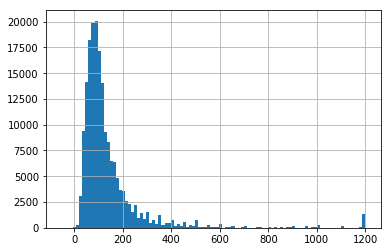

In [195]:
# cols = ['m_maximum_nights']
# for col in cols:
# plt.plot(data[col], mode='hist', title = col,bins=100)

vis_data.loc[vis_data['m_effective_daily_price'] > 1200, 'm_effective_daily_price'] = 1200
vis_data['m_effective_daily_price'].hist(bins=100)

###  Correlation

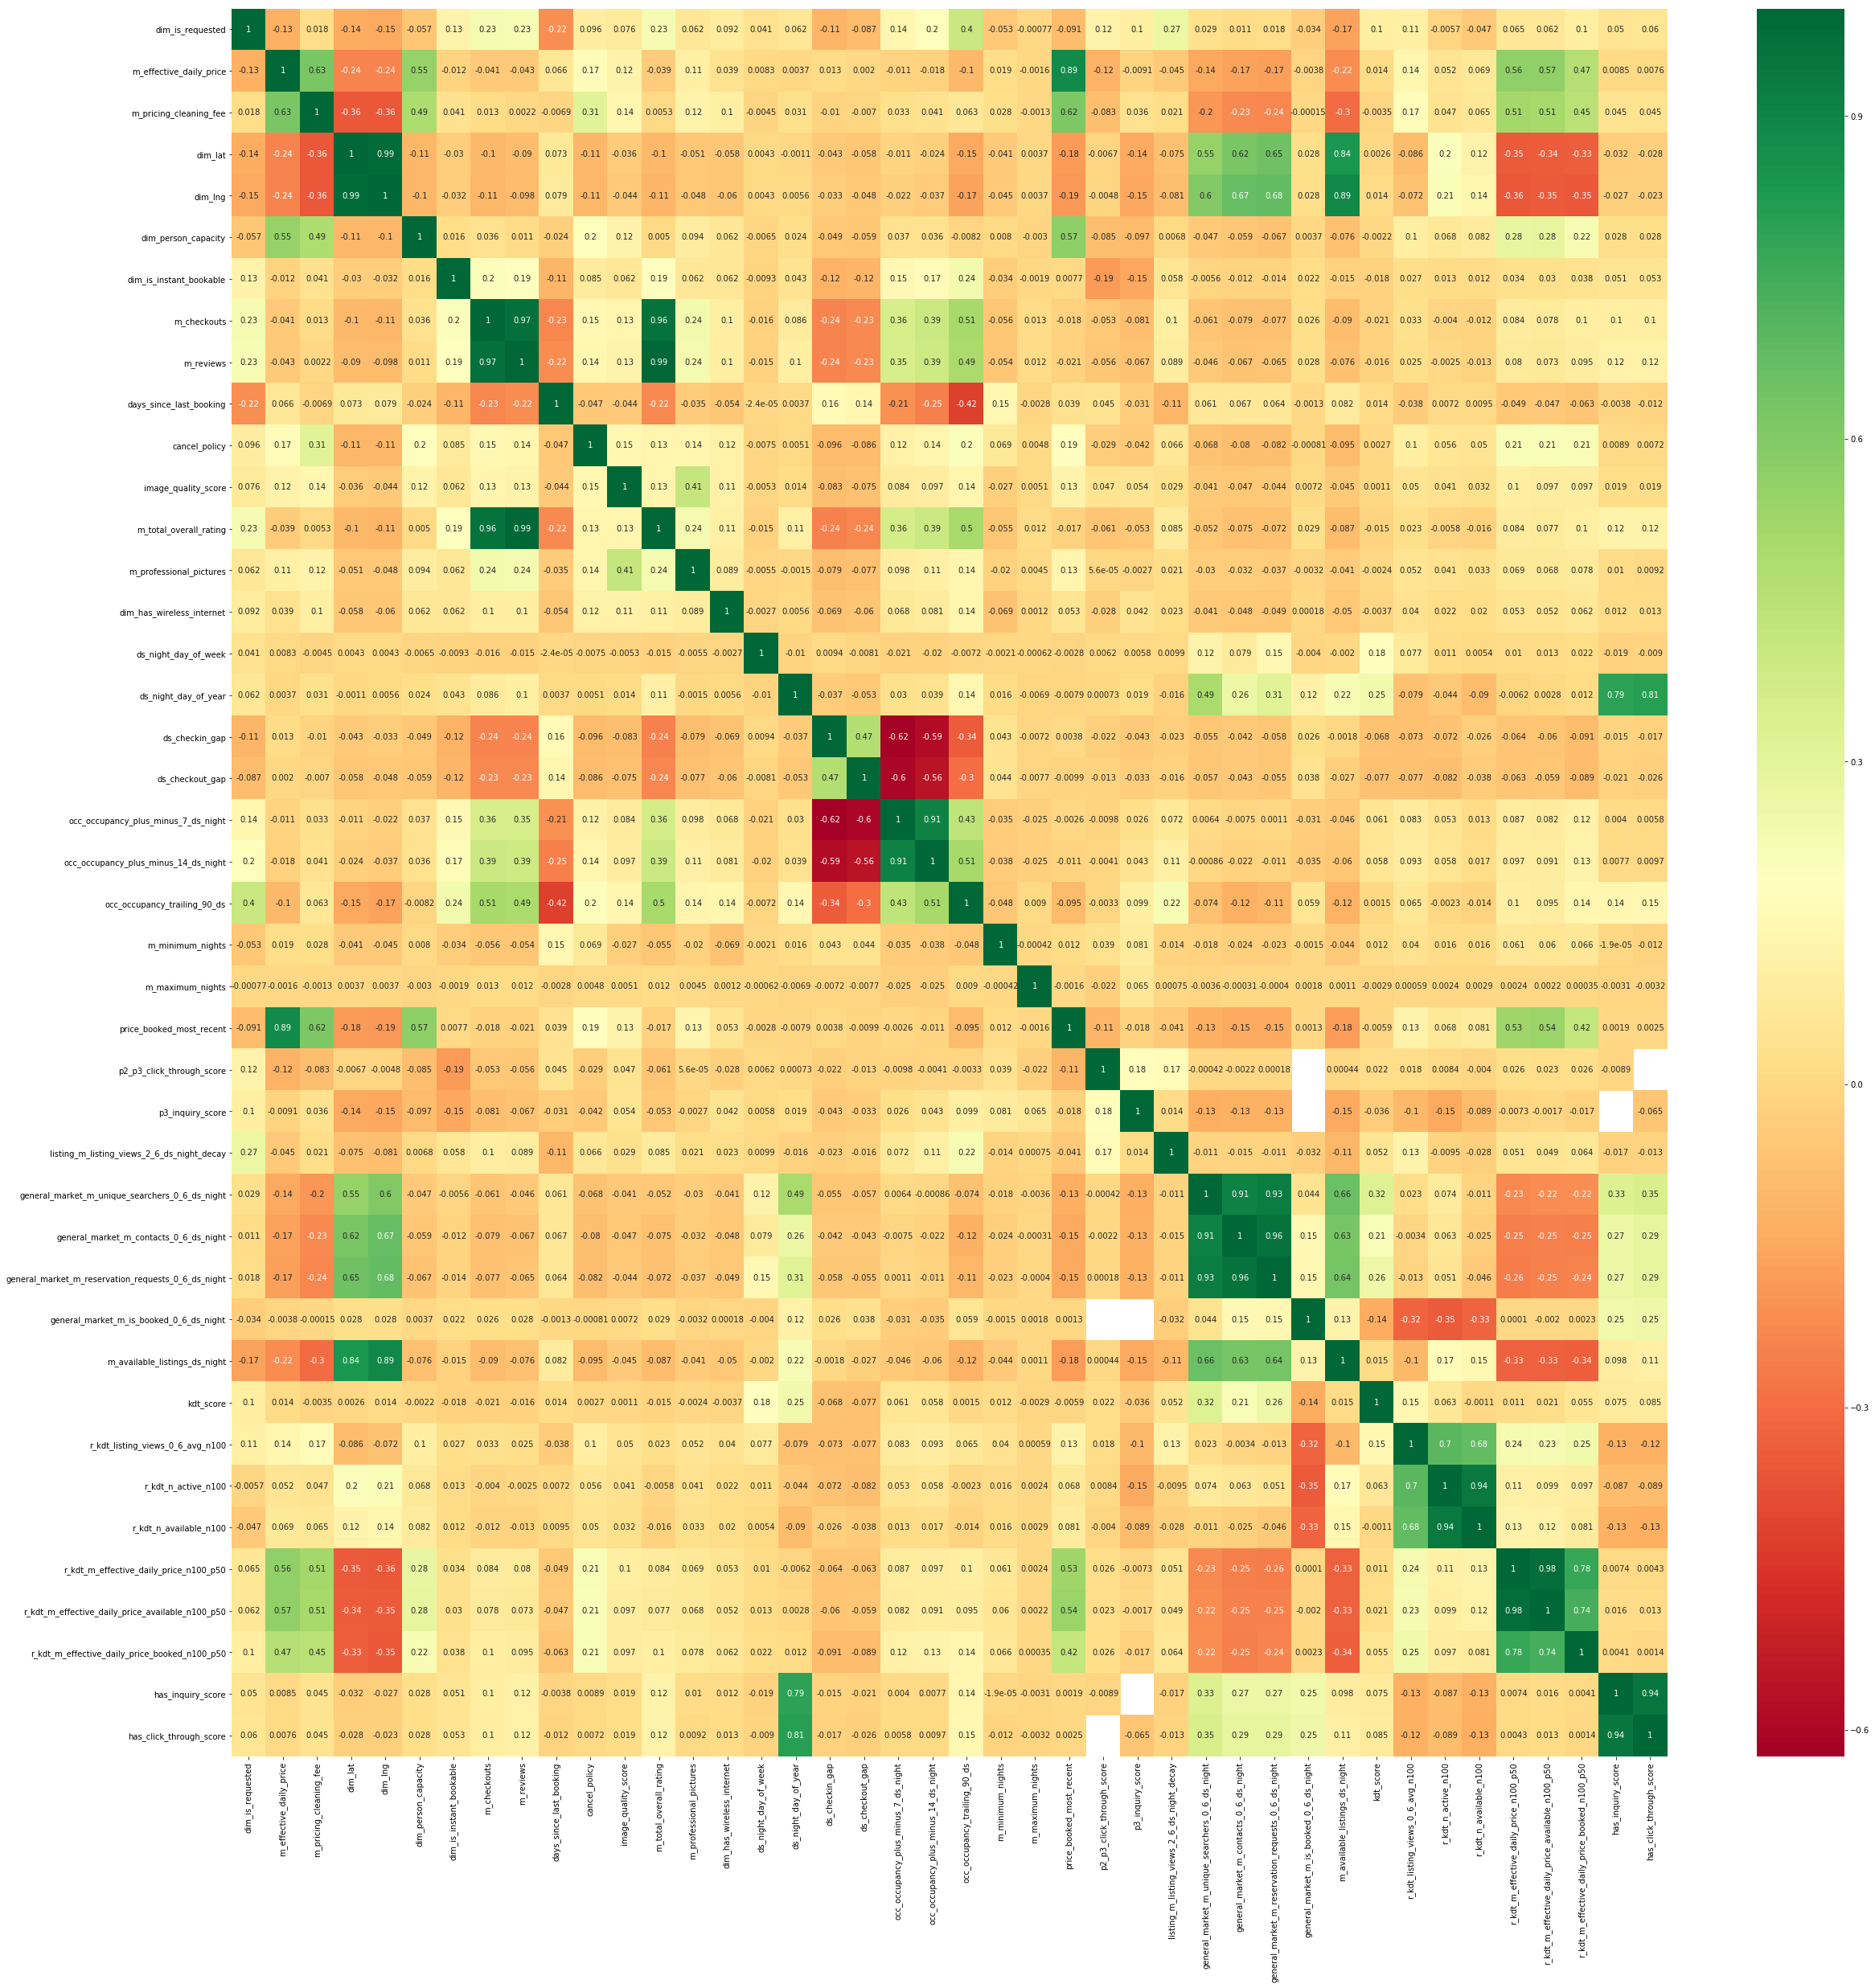

In [196]:
# heatmap

corrmat = vis_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(vis_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [197]:
least_corr = abs(corrmat['dim_is_requested']).sort_values(ascending = False)
least_corr

dim_is_requested                                      1.000000
occ_occupancy_trailing_90_ds                          0.397357
listing_m_listing_views_2_6_ds_night_decay            0.274125
m_checkouts                                           0.231641
m_total_overall_rating                                0.229227
m_reviews                                             0.225445
days_since_last_booking                               0.215444
occ_occupancy_plus_minus_14_ds_night                  0.196271
m_available_listings_ds_night                         0.165552
dim_lng                                               0.147375
occ_occupancy_plus_minus_7_ds_night                   0.139429
dim_lat                                               0.139256
m_effective_daily_price                               0.128779
dim_is_instant_bookable                               0.127496
p2_p3_click_through_score                             0.122704
ds_checkin_gap                                        0

### Pearson Correlation

In [199]:
temp = vis_data.drop(['dim_is_requested'],1)
c1 = temp.corr().abs().unstack()
corlist = c1.sort_values(ascending = False)

corlist[41:60]

m_total_overall_rating                              m_reviews                                             0.994551
m_reviews                                           m_total_overall_rating                                0.994551
dim_lat                                             dim_lng                                               0.986279
dim_lng                                             dim_lat                                               0.986279
r_kdt_m_effective_daily_price_available_n100_p50    r_kdt_m_effective_daily_price_n100_p50                0.977772
r_kdt_m_effective_daily_price_n100_p50              r_kdt_m_effective_daily_price_available_n100_p50      0.977772
m_checkouts                                         m_reviews                                             0.972670
m_reviews                                           m_checkouts                                           0.972670
m_total_overall_rating                              m_checkouts                 

# Feature Engineering

In [203]:
# dealing with multicolinearity

cor = abs(data[['m_total_overall_rating','m_reviews','m_checkouts','r_kdt_m_effective_daily_price_available_n100_p50', 'r_kdt_m_effective_daily_price_n100_p50','dim_is_requested']].corr())
cor['dim_is_requested']

m_total_overall_rating                              0.229227
m_reviews                                           0.225445
m_checkouts                                         0.231641
r_kdt_m_effective_daily_price_available_n100_p50    0.062400
r_kdt_m_effective_daily_price_n100_p50              0.065470
dim_is_requested                                    1.000000
Name: dim_is_requested, dtype: float64

### Categorical

In [ ]:
# get dummy variables
data['dim_market'] = pd.get_dummies(data['dim_market'])
data['dim_room_type'] = pd.get_dummies(data['dim_room_type'])

In [114]:
# # label encoding
# le = LabelEncoder()
# data['id_listing_anon'] = le.fit_transform(data['id_listing_anon'])
# data['id_user_anon'] = le.fit_transform(data['id_user_anon'])

In [204]:
# deal with pictures
data['has_pictures'] = data['m_professional_pictures'].apply(lambda x: 0 if x == 0 else 1)
cor = abs(data[['has_pictures','m_professional_pictures', 'dim_is_requested']].corr())
cor['dim_is_requested']

has_pictures               0.094854
m_professional_pictures    0.062465
dim_is_requested           1.000000
Name: dim_is_requested, dtype: float64

In [205]:
# extract month from ds_night
data['month'] = data['ds_night'].str.split('-').str.get(1).astype('int')
cor = abs(data[['month', 'dim_is_requested']].corr())
cor['dim_is_requested']

month               0.063526
dim_is_requested    1.000000
Name: dim_is_requested, dtype: float64

In [206]:

data['total_price'] = data['m_effective_daily_price'] + data['m_pricing_cleaning_fee']
cor = abs(data[['total_price','m_effective_daily_price','m_pricing_cleaning_fee', 'dim_is_requested']].corr())
cor['dim_is_requested']

total_price                0.079465
m_effective_daily_price    0.089958
m_pricing_cleaning_fee     0.017996
dim_is_requested           1.000000
Name: dim_is_requested, dtype: float64

In [245]:
# user mean
# price_booked_most_recent, days_since_last_booking, 
# occ_occupancy_plus_minus_7_ds_night,occ_occupancy_plus_minus_14_ds_night  
# image_quality_score, r_kdt_m_effective_daily_price_booked_n100_p50, occ_occupancy_trailing_90_ds                          
# listing_m_listing_views_2_6_ds_night_decay, ds_checkout_gap, m_minimum_nights, m_maximum_nights  
# ds_checkin_gap, m_checkouts, m_reviews, 
# m_total_overall_rating, 
# r_kdt_m_effective_daily_price_available_n100_p50      
# r_kdt_m_effective_daily_price_n100_p50                
# r_kdt_n_active_n100                                   
# r_kdt_n_available_n100   

cols = ['price_booked_most_recent', 'days_since_last_booking', 'm_total_overall_rating', 
        'm_reviews', 'm_checkouts','m_effective_daily_price', 'm_pricing_cleaning_fee']

for col in cols:
    mean = data.groupby('id_user_anon')[col].mean()
    data[col+'_by_user'] = data['id_user_anon'].apply(lambda x: mean[x])

In [ ]:
# listing mean

cols = ['price_booked_most_recent', 'days_since_last_booking', 'm_total_overall_rating', 
        'm_reviews', 'm_checkouts','m_effective_daily_price', 'm_pricing_cleaning_fee',
        '']

In [315]:
# replace missing values with median
for col in missing_cols:
    if col in ['p2_p3_click_through_score', 'p3_inquiry_score']: 
        continue
    median = data[col].median(skipna = True)
    data[col].fillna(median, inplace = True)

### Deal with Skewness

log_m_effective_daily_price    0.168563
m_effective_daily_price        0.089958
dim_is_requested               1.000000
Name: dim_is_requested, dtype: float64

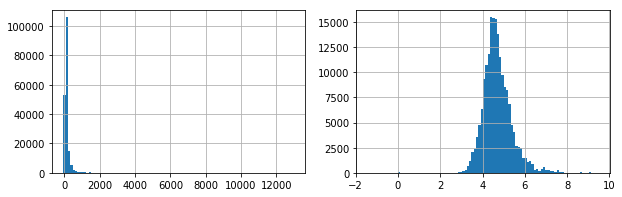

In [302]:
# m_effective_daily_price                           

data['m_effective_daily_price_plus1'] = data['m_effective_daily_price'] + 1
data['log_m_effective_daily_price'] = np.log(data['m_effective_daily_price_plus1'])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
data['m_effective_daily_price'].hist(bins=100, ax=axes[0])
data['log_m_effective_daily_price'].hist(bins=100, ax=axes[1])

cor = abs(data[['log_m_effective_daily_price','m_effective_daily_price', 'dim_is_requested']].corr())
cor['dim_is_requested']

log_price_booked_most_recent    0.080939
price_booked_most_recent        0.055558
dim_is_requested                1.000000
Name: dim_is_requested, dtype: float64

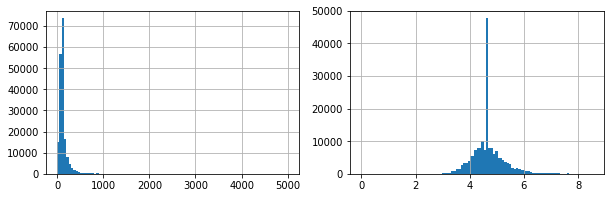

In [309]:
# price_booked_most_recent

data['price_booked_most_recent_plus1'] = data['price_booked_most_recent'] + 1
data['log_price_booked_most_recent'] = np.log(data['price_booked_most_recent_plus1'])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
data['price_booked_most_recent'].hist(bins=100, ax=axes[0])
data['log_price_booked_most_recent'].hist(bins=100, ax=axes[1])

cor = abs(data[['log_price_booked_most_recent','price_booked_most_recent', 'dim_is_requested']].corr())
cor['dim_is_requested']

log_r_kdt_m_effective_daily_price_available_n100_p50    0.092155
r_kdt_m_effective_daily_price_available_n100_p50        0.062375
dim_is_requested                                        1.000000
Name: dim_is_requested, dtype: float64

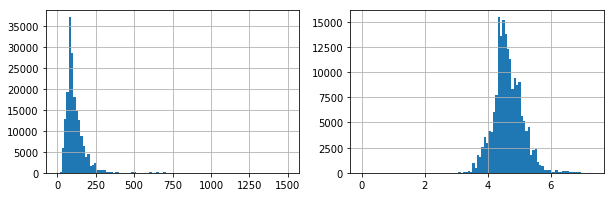

In [312]:
# r_kdt_m_effective_daily_price_available_n100_p50

data['r_kdt_m_effective_daily_price_available_n100_p50_plus1'] = data['r_kdt_m_effective_daily_price_available_n100_p50'] + 1
data['log_r_kdt_m_effective_daily_price_available_n100_p50'] = np.log(data['r_kdt_m_effective_daily_price_available_n100_p50_plus1'])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
data['r_kdt_m_effective_daily_price_available_n100_p50'].hist(bins=100, ax=axes[0])
data['log_r_kdt_m_effective_daily_price_available_n100_p50'].hist(bins=100, ax=axes[1])

cor = abs(data[['log_r_kdt_m_effective_daily_price_available_n100_p50','r_kdt_m_effective_daily_price_available_n100_p50', 'dim_is_requested']].corr())
cor['dim_is_requested']

log_r_kdt_m_effective_daily_price_n100_p50    0.095700
r_kdt_m_effective_daily_price_n100_p50        0.065471
dim_is_requested                              1.000000
Name: dim_is_requested, dtype: float64

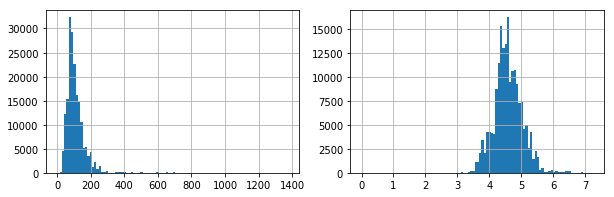

In [313]:
# r_kdt_m_effective_daily_price_n100_p50            

data['r_kdt_m_effective_daily_price_n100_p50_plus1'] = data['r_kdt_m_effective_daily_price_n100_p50'] + 1
data['log_r_kdt_m_effective_daily_price_n100_p50'] = np.log(data['r_kdt_m_effective_daily_price_n100_p50_plus1'])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
data['r_kdt_m_effective_daily_price_n100_p50'].hist(bins=100, ax=axes[0])
data['log_r_kdt_m_effective_daily_price_n100_p50'].hist(bins=100, ax=axes[1])

cor = abs(data[['log_r_kdt_m_effective_daily_price_n100_p50','r_kdt_m_effective_daily_price_n100_p50', 'dim_is_requested']].corr())
cor['dim_is_requested']

log_r_kdt_m_effective_daily_price_booked_n100_p50    0.118402
r_kdt_m_effective_daily_price_booked_n100_p50        0.103422
dim_is_requested                                     1.000000
Name: dim_is_requested, dtype: float64

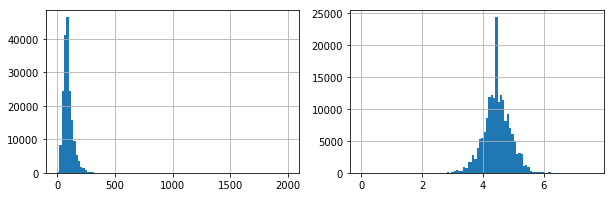

In [317]:
# r_kdt_m_effective_daily_price_booked_n100_p50 

data['r_kdt_m_effective_daily_price_booked_n100_p50_plus1'] = data['r_kdt_m_effective_daily_price_booked_n100_p50'] + 1
data['log_r_kdt_m_effective_daily_price_booked_n100_p50'] = np.log(data['r_kdt_m_effective_daily_price_booked_n100_p50_plus1'])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
data['r_kdt_m_effective_daily_price_booked_n100_p50'].hist(bins=100, ax=axes[0])
data['log_r_kdt_m_effective_daily_price_booked_n100_p50'].hist(bins=100, ax=axes[1])

cor = abs(data[['log_r_kdt_m_effective_daily_price_booked_n100_p50','r_kdt_m_effective_daily_price_booked_n100_p50', 'dim_is_requested']].corr())
cor['dim_is_requested']

log_r_kdt_n_active_n100    0.017113
r_kdt_n_active_n100        0.005715
dim_is_requested           1.000000
Name: dim_is_requested, dtype: float64

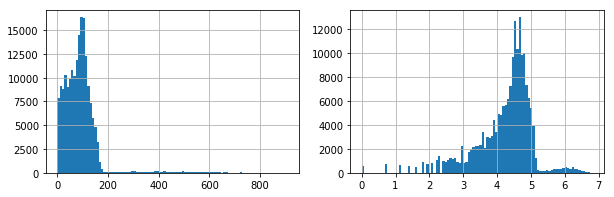

In [320]:
# r_kdt_n_active_n100

data['log_r_kdt_n_active_n100'] = np.log(data['r_kdt_n_active_n100'])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
data['r_kdt_n_active_n100'].hist(bins=100, ax=axes[0])
data['log_r_kdt_n_active_n100'].hist(bins=100, ax=axes[1])

cor = abs(data[['log_r_kdt_n_active_n100','r_kdt_n_active_n100', 'dim_is_requested']].corr())
cor['dim_is_requested']

In [ ]:
# listing_m_listing_views_2_6_ds_night_decay            7.911180
# r_kdt_listing_views_0_6_avg_n100                      4.080780

### Drop Columns

In [243]:
# drop
# cols = ['m_professional_pictures', 'm_effective_daily_price', m_effective_daily_price_plus1']

# Delete after taking log and normalization
# cols += ['m_effective_daily_price', 'm_effective_daily_price_plus1', 
#          'price_booked_most_recent', 'price_booked_most_recent_plus1',
#          'r_kdt_m_effective_daily_price_available_n100_p50', 'r_kdt_m_effective_daily_price_available_n100_p50_plus1',
#          'r_kdt_m_effective_daily_price_n100_p50','r_kdt_m_effective_daily_price_n100_p50_plus1',
#          'r_kdt_m_effective_daily_price_booked_n100_p50', 'r_kdt_m_effective_daily_price_booked_n100_p50_plus1', 
#          'r_kdt_n_active_n100']